# Trabajo Práctico Semanal 8
Teoria de circuitos II

### Sandomir L Uriel

<img src="https://i.gyazo.com/c58c0e649c1a1d34820f255c0efe3799.png"/>

#### Análisis de cuadripolos

Podemos separar nuestro circuito en distintos cuadripolos de la siguiente manera para poder analizarlos de manera mas sensilla:
<br>
<img src="https://i.gyazo.com/38aefe63ac3455ab23e626bd885023b6.png"/>

<img src="https://i.gyazo.com/7bab5f696f8f887896aab8ba5754ea45.png"/>
<br><br>


#### Simulacion circuital
<br>

<img src="https://i.gyazo.com/5236dc0e397e0285a9e88a5a544ec45b.png"/>
<img src="https://i.gyazo.com/5822c0e3dbb48e7fdace488c7d4dd259.png"/>

#### Analisis matricial
<br>
<img src="https://i.gyazo.com/e7ae1f3f1f921ea564552f2d8237c6da.png"/>

#### Simulacion matematica

In [7]:
import sympy as sp
from splane import print_latex, calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn
from IPython.display import display, Math, Latex

'''    
+ Cuadripolo

1----Y1----4----Y3----3
           |          |
           Y2         G4
           |          |
           2          | 
'''    

Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3', complex=True)
G4 = sp.symbols('G4', real=True, positive=True)

### MAI

#               Nodos: 1      2        3        4
Ymai = sp.Matrix([  
                    [ Y1,   0,      0,     -Y1],
                    [ 0,   Y2+G4,   -G4,   -Y2],
                    [ 0,   -G4,    G4+Y3,  -Y3],
                    [ -Y1, -Y2, -Y3,  Y1+Y2+Y3]
                 ])

# con_detalles = False
con_detalles = True

print('Transferencia de tensión:')
A = calc_MAI_vtransf_ij_mn(Ymai, 1, 2, 0, 1, verbose=con_detalles)
A = sp.simplify(A.subs(Y1*Y2, G4**2))


Transferencia de tensión:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br><br><br><br><br><br><br>
## Segunda parte


<img src="https://i.gyazo.com/243d302b46db431e7b6d97312c87ff4f.png"/>

Conocemos la funcion transferencia de un filtro Pasa-Bajos Butterworth de 2do orden:
<br>
$H_{(s)} = \frac{1}{s^2 + s\sqrt{2} + 1}$
<br><br>
Desnormalizando por la $\omega_c$:
<br><br>
$H_{(s)} = \frac{1}{{(\frac{s}{2\pi1KHz})}^2 + (\frac{s}{2\pi1KHz})\sqrt{2} + 1}$
<br><br>
Aplicando el nucleo de la transformacion bilineal $s \rightarrow 2fs\frac{z+1}{z-1}$
<br><br>
$H_{(s)} = \frac{1}{{({\frac{2fs\frac{z+1}{z-1}}{2\pi1KHz}})}^2 + {(\frac{2fs\frac{z+1}{z-1}}{2\pi1KHz})}\sqrt{2} + 1}$

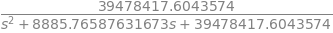

In [6]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy import *
init_printing(use_unicode=True)
s, Z = symbols('s Z',relational=True)

fc=1000
wc=2*np.pi*fc
fs=100*10**3
K=2*fs

## Transferencia desnormalizada

H=(wc)**2/(s*s+wc*np.sqrt(2)*s+wc**2)
H

<br><br>
### Punto A: Fs=100KHz
<br>

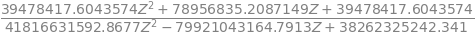

In [27]:
## Fs = 100KHz
H=H.subs(s,2*fs*(Z-1)/(Z+1))
simplify(Hz)

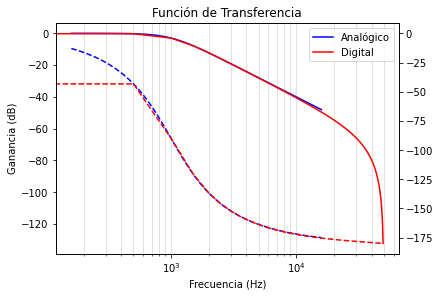

In [25]:
fig, ax = plt.subplots(constrained_layout=True)

transf_digital = signal.TransferFunction([39478417.60,78956835.20,39478417.60], [41816631592.86, -79921043164.79,38262325242.34], dt=1/fs)
transf_analog = signal.TransferFunction([(2*np.pi*fc)**2], [1, 2*np.pi*fc*np.sqrt(2), (2*np.pi*fc)**2])

wa, maga,phasea = transf_analog.bode()
wd, magd,phased = signal.dbode(transf_digital)

ax.semilogx(wa/(2*math.pi), maga,color='b',label='Analógico')
ax.semilogx(wd/(2*math.pi), magd,color='r',label='Digital ')


ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')
plt.legend()
ax2 = ax.twinx()
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')

ax2.semilogx(wa/(2*math.pi), phasea,color='b',linestyle='dashed')
ax2.semilogx(wd/(2*math.pi), phased,color='r',linestyle='dashed')

<br><br>
### Punto B: Fs=10KHz
<br>

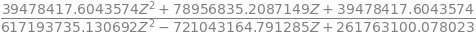

In [33]:
## Fs=10KHz
fs=10*10**3
Hz=H.subs(s,2*fs*(Z-1)/(Z+1))
simplify(Hz)

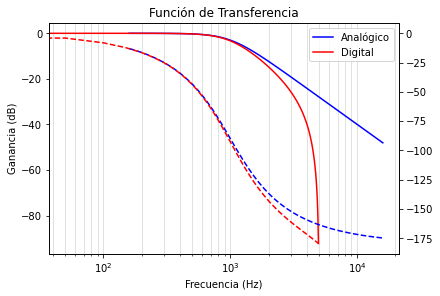

In [31]:
fig, ax = plt.subplots(constrained_layout=True)

transf_digital = signal.TransferFunction([39478417.60,78956835.20,39478417.60], [617193735.13, -721043164.79,261763100.07], dt=1/fs)
transf_analog = signal.TransferFunction([(2*np.pi*fc)**2], [1, 2*np.pi*fc*np.sqrt(2), (2*np.pi*fc)**2])

wa, maga,phasea = transf_analog.bode()
wd, magd,phased = signal.dbode(transf_digital)

ax.semilogx(wa/(2*math.pi), maga,color='b',label='Analógico')
ax.semilogx(wd/(2*math.pi), magd,color='r',label='Digital ')


ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')
plt.legend()
ax2 = ax.twinx()
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')

ax2.semilogx(wa/(2*math.pi), phasea,color='b',linestyle='dashed')
ax2.semilogx(wd/(2*math.pi), phased,color='r',linestyle='dashed')

<br><br>
### Punto C: Pasa altos @ Fs=100KHz
<br>

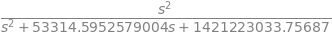

In [56]:
fc = 6*10**3
fs = 100*10**3
wc = 2*np.pi*fc

## Transferencia desnormalizada

H=s**2/(s**2+s*wc*np.sqrt(2)+wc**2)
H

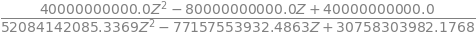

In [57]:
## Aplicando la transformacion bilineal
## Fs = 100KHz
Hz=H.subs(s,(2*fs*(Z-1)/(Z+1)))
simplify(Hz)

B:\Users\Uriel\anaconda3\lib\site-packages\scipy\signal\ltisys.py:3860: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


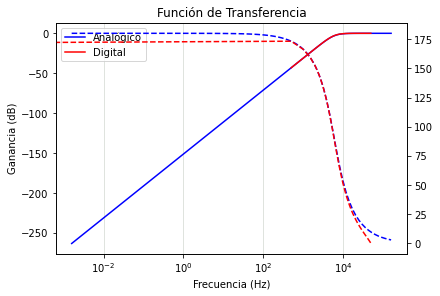

In [58]:
fig, ax = plt.subplots(constrained_layout=True)

transf_digital = signal.TransferFunction([40000000000.0,-80000000000.0,40000000000.0], [52084142085.3369, -77157553932.4863,30758303982.1768], dt=1/fs)
transf_analog = signal.TransferFunction([1, 0 , 0], [1, 53314.5952579004, 1421223033.75687])

wa, maga,phasea = transf_analog.bode()
wd, magd,phased = signal.dbode(transf_digital)

ax.semilogx(wa/(2*math.pi), maga,color='b',label='Analógico')
ax.semilogx(wd/(2*math.pi), magd,color='r',label='Digital ')


ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')
plt.legend()
ax2 = ax.twinx()
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')

ax2.semilogx(wa/(2*math.pi), phasea,color='b',linestyle='dashed')
ax2.semilogx(wd/(2*math.pi), phased,color='r',linestyle='dashed')

<br><br>
### Punto C: Pasa altos @ Fs=10KHz
<br>

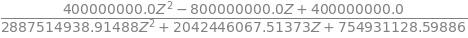

In [62]:
## Fs=10KHz
fs=10*10**3
Hz=H.subs(s,(2*fs*(Z-1)/(Z+1)))
simplify(Hz)

B:\Users\Uriel\anaconda3\lib\site-packages\scipy\signal\ltisys.py:3860: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


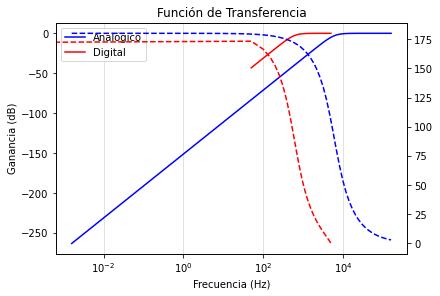

In [60]:
fig, ax = plt.subplots(constrained_layout=True)

transf_digital = signal.TransferFunction([40000000000.0,-80000000000.0,40000000000.0], [52084142085.3369, -77157553932.4863,30758303982.1768], dt=1/fs)
transf_analog = signal.TransferFunction([1, 0 , 0], [1, 53314.5952579004, 1421223033.75687])

wa, maga,phasea = transf_analog.bode()
wd, magd,phased = signal.dbode(transf_digital)

ax.semilogx(wa/(2*math.pi), maga,color='b',label='Analógico')
ax.semilogx(wd/(2*math.pi), magd,color='r',label='Digital ')


ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')
plt.legend()
ax2 = ax.twinx()
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')

ax2.semilogx(wa/(2*math.pi), phasea,color='b',linestyle='dashed')
ax2.semilogx(wd/(2*math.pi), phased,color='r',linestyle='dashed')

De ser de nuestro interes, podriamos ajustar la frecuencia de corte de este ultimo caso donde son diferentes en la digital con la analogica por medio de un prewarping para forzar que estas coincidan.

<br><br><br>
<img src="https://i.gyazo.com/c5e67af7a6cdc1256a4e22f4ff45f069.png"/>

### Filtro de media móvil

<br><br>
<img src="https://i.gyazo.com/da669a8363a8ab012ffb343f05f8213b.png"/>
<br>

Obtenemos de esta manera $H_{1(Z)}$ y la respuesta en modulo y fase de nuestra funcion transferencia.
<br>
Vemos un cero en Z=-1
<br>

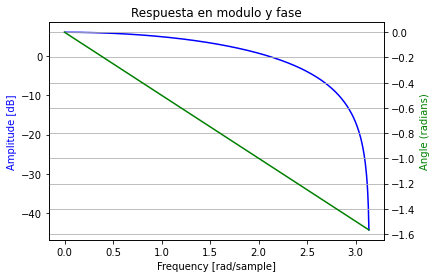

In [70]:
import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp

## Filtro de media movil

num1 = [1, 1]
den1 = [1]

w1,h1 = signal.freqz(num1,den1)

fig, ax1 = plt.subplots()
ax1.set_title('Respuesta en modulo y fase')
ax1.plot(w1, 20 * np.log10(abs(h1)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h1))
ax2.plot(w1, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

<br><br>
<img src="https://i.gyazo.com/c6b1c46b2d4763a812a68e945c2d8477.png"/>
<br>

<br>
Lo mismo para $H_{2(Z)}$ obteniendo un par de ceros conjugados sobre circunferencia de radio unitario
<br>

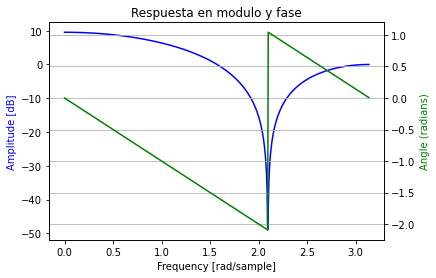

In [76]:
num2 = [1, 1, 1]
den2 = [1]

w2,h2 = signal.freqz(num2,den2)

fig, ax1 = plt.subplots()
ax1.set_title('Respuesta en modulo y fase')
ax1.plot(w2, 20 * np.log10(abs(h2)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h2))
ax2.plot(w2, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

Si deseamos obtener la media aritmetica de nuestras muestras, basta con dividir el modulo de la transferencia por la cantidad de muestras. 
<br>
$N_{H_1}=2$ y $N_{H_2}=3$
<br><br>
Si queremos eliminar la intereferencia causada por la frecuencia de la linea de 50Hz, podemos hacer prewarping haciendo coincidir la frecuencia de corte con 50Hz:
<br>
$2Fs = \frac{\pi.50Hz}{tg(\pi.\frac{fc}{fs})}$
<br>
$Fs = 150Hz$

<br><br>
### Filtro diferenciador
<br>

<br><br>
<img src="https://i.gyazo.com/5277b282e518df28906d5f75102e3e51.png"/>
<br>

Vemos en este caso, un cero en Z = 1

C:\Users\Uriel\AppData\Local\Temp/ipykernel_5096/3186704416.py:10: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w1, 20 * np.log10(abs(h1)), 'b')


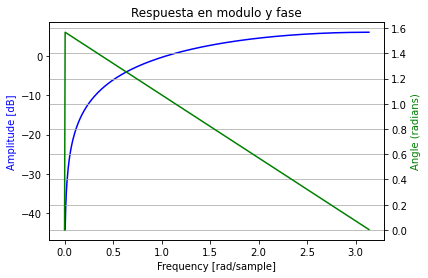

In [77]:
## Filtro diferenciador

num1 = [1, -1]
den1 = [1]

w1,h1 = signal.freqz(num1,den1)

fig, ax1 = plt.subplots()
ax1.set_title('Respuesta en modulo y fase')
ax1.plot(w1, 20 * np.log10(abs(h1)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h1))
ax2.plot(w1, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

<br><br>
<img src="https://i.gyazo.com/5d9653460206ee9ca82bf1f7bbcd4b4f.png"/>
<br>

En este caso, encontramos un cero en Z=1 y otro en Z=-1

C:\Users\Uriel\AppData\Local\Temp/ipykernel_5096/895511662.py:8: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w2, 20 * np.log10(abs(h2)), 'b')


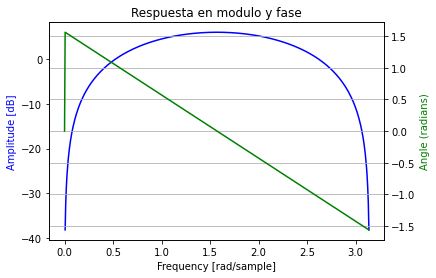

In [78]:
num2 = [1, 0, -1]
den2 = [1]

w2,h2 = signal.freqz(num2,den2)

fig, ax1 = plt.subplots()
ax1.set_title('Respuesta en modulo y fase')
ax1.plot(w2, 20 * np.log10(abs(h2)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h2))
ax2.plot(w2, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()